# Electricity Production Analysis

In [232]:
# %pip install statsmodels

In [233]:
import pandas as pd
# import datetime
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from time import time
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np


register_matplotlib_converters()

In [234]:
def parser(s):
    return pd.datetime.strptime(s, '%Y-%m-%d')

In [235]:
data = pd.read_csv('Electric_Production.csv', parse_dates=[0],index_col = 0,  squeeze=True, date_parser=parser)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_27676/1275219866.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(s, '%Y-%m-%d')


In [236]:
data

DATE
1985-01-01     72.5052
1985-01-02     70.6720
1985-01-03     62.4502
1985-01-04     57.4714
1985-01-05     55.3151
                ...   
2017-01-09     98.6154
2017-01-10     93.6137
2017-01-11     97.3359
2017-01-12    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [237]:
data.shape

(397,)

In [238]:
# data.info()

In [239]:
# data.rename(columns = {'IPN31152N':'Quantity'}, inplace = True)

In [240]:
data.describe()

count    397.000000
mean      88.847218
std       15.387834
min       55.315100
25%       77.105200
50%       89.779500
75%      100.524400
max      129.404800
Name: IPG2211A2N, dtype: float64

In [241]:
data.asfreq(pd.infer_freq(data.index))

DATE
1985-01-01     72.5052
1985-01-02     70.6720
1985-01-03     62.4502
1985-01-04     57.4714
1985-01-05     55.3151
                ...   
2017-12-28         NaN
2017-12-29         NaN
2017-12-30         NaN
2017-12-31         NaN
2018-01-01    129.4048
Freq: D, Name: IPG2211A2N, Length: 12054, dtype: float64

In [242]:
data.index[-1]

Timestamp('2018-01-01 00:00:00')

Text(0, 0.5, 'Production')

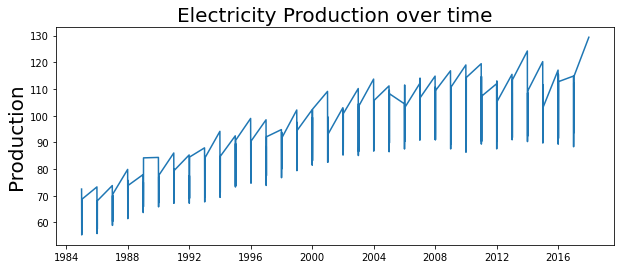

In [243]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.title('Electricity Production over time', fontsize =  20)
plt.ylabel('Production', fontsize =  20)


<b>We will cut Short the data from 1998 to 2018</b>

In [244]:
startdate = pd.to_datetime('1998-01-01')
data = data[startdate:]

In [245]:
data

DATE
1998-01-01     94.7920
1998-01-02     87.8200
1998-01-03     86.5549
1998-01-04     76.7521
1998-01-05     78.0303
                ...   
2017-01-09     98.6154
2017-01-10     93.6137
2017-01-11     97.3359
2017-01-12    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 241, dtype: float64

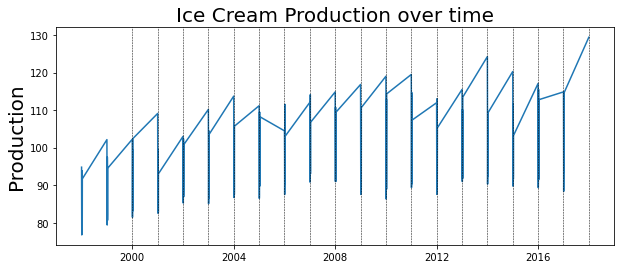

In [246]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.title('Ice Cream Production over time', fontsize =  20)
plt.ylabel('Production', fontsize =  20)
for year in range(2000, 2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--',linewidth=0.5 )


### Some Conclusions

<ul>
<li>The yearly pattern seems Cyclic</li>
<li>The series seems to be stationary</li>
<li>The sales have significantly increased in the recent years</li>
<li>The series shows a small yet noticable increasing Trend</li>

<ul>

### Plotting ACF

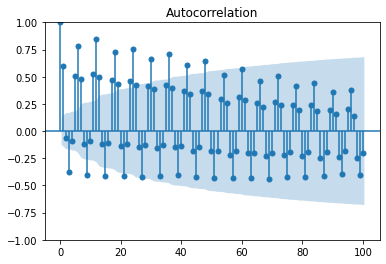

In [247]:
acf_plot = plot_acf(data, lags = 100)

It seems like the pattern is narrowing down with time, which indicates the amount of correlation averaging near 0

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


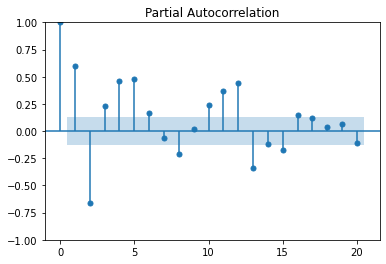

In [248]:
pacf_plot = plot_pacf(data, lags = 20)

The PACF shows strong spikes at first 3 lags, so we should try an MA(3) model"

### Splitting the DAtaset

In [249]:
train_end = pd.to_datetime('2016-01-01')
valid_end = pd.to_datetime('2018-01-01')

In [250]:
train_data = data[:train_end]
valid_data = data[train_end+ timedelta(days = 1):valid_end]

In [251]:
valid_data

DATE
2016-01-02    106.6688
2016-01-03     95.3548
2016-01-04     89.3254
2016-01-05     90.7369
2016-01-06    104.0375
2016-01-07    114.5397
2016-01-08    115.5159
2016-01-09    102.7637
2016-01-10     91.4867
2016-01-11     92.8900
2016-01-12    112.7694
2017-01-01    114.8505
2017-01-02     99.4901
2017-01-03    101.0396
2017-01-04     88.3530
2017-01-05     92.0805
2017-01-06    102.1532
2017-01-07    112.1538
2017-01-08    108.9312
2017-01-09     98.6154
2017-01-10     93.6137
2017-01-11     97.3359
2017-01-12    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, dtype: float64

# Fitting the AR model

In [252]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(train_data, order=(0, 0,3))
results = ARMA_model.fit()
print(results.summary())

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  217
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -686.486
Date:                Tue, 10 Jan 2023   AIC                           1382.972
Time:                        19:14:12   BIC                           1399.871
Sample:                             0   HQIC                          1389.799
                                - 217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.0755      1.501     65.336      0.000      95.133     101.018
ma.L1          1.2820      0.071     18.007      0.000       1.142       1.422
ma.L2          0.9928      0.094     10.527      0.0

Conclusions

All the Lags seems to be pretty important since the P-value is sufficiently low

#### Predicting values on the valid,data

In [253]:
valid_data

DATE
2016-01-02    106.6688
2016-01-03     95.3548
2016-01-04     89.3254
2016-01-05     90.7369
2016-01-06    104.0375
2016-01-07    114.5397
2016-01-08    115.5159
2016-01-09    102.7637
2016-01-10     91.4867
2016-01-11     92.8900
2016-01-12    112.7694
2017-01-01    114.8505
2017-01-02     99.4901
2017-01-03    101.0396
2017-01-04     88.3530
2017-01-05     92.0805
2017-01-06    102.1532
2017-01-07    112.1538
2017-01-08    108.9312
2017-01-09     98.6154
2017-01-10     93.6137
2017-01-11     97.3359
2017-01-12    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, dtype: float64

In [258]:
valid_data.index[0] in valid_data

True

In [254]:
predictions = results.predict(start = valid_data.index[0], end = valid_data.index[-1])
residuals = valid_data-predictions

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
residuals

DATE
1998-01-01   NaN
1998-01-02   NaN
1998-01-03   NaN
1998-01-04   NaN
1998-01-05   NaN
              ..
2017-01-09   NaN
2017-01-10   NaN
2017-01-11   NaN
2017-01-12   NaN
2018-01-01   NaN
Length: 241, dtype: float64

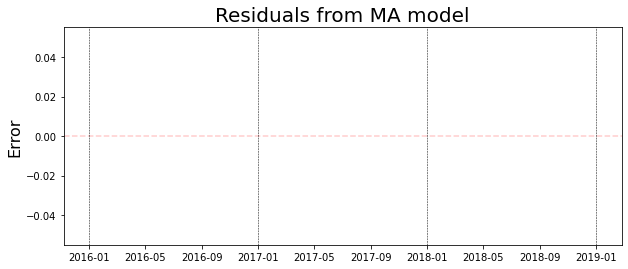

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from MA model', fontsize =20)
plt.ylabel('Error', fontsize = 16)
plt.axhline(0, color = 'r', linestyle = '--', alpha = 0.2)

for year in range(2016, 2020):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', linewidth = 0.5)

#### Predictions Vs Actual Data

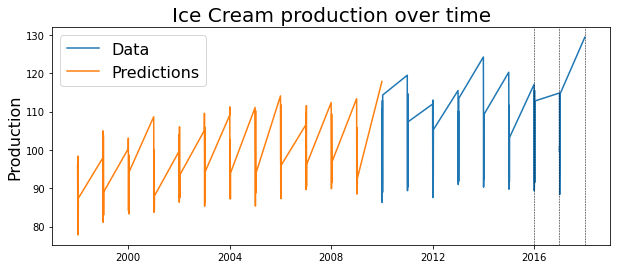

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(valid_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize= 16)

plt.title('Ice Cream production over time', fontsize = 20)
plt.ylabel('Production', fontsize = 16)

for year in range(2016, 2020):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', linewidth = 0.5)


As you can see, the model is not that bad in the beginning but as soon as you go longer and longer the accuracy of the model is fading

In [ ]:
print('Mean Absoulute Percent Error', round(np.mean(abs(residuals/valid_data)),4))

Mean Absoulute Percent Error nan


In [ ]:
print('Root Mean Squared  Error', np.sqrt(np.mean(residuals**2)))

Root Mean Squared  Error nan


We performed all this on an AR(3) model now, we will try differnt models to check which is better. (Re-runnig the above, by changing the values)

#### Hence we built a strong model which could predict good outcomes using the Ice cream Procduction Dataset